In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

#Data info

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/obesity_train.csv')

In [ ]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [ ]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
Obesity_Num                         int64
GenderCode                          int64
dtype: object

In [ ]:
df['FAVC'].value_counts()

yes    18982
no      1776
Name: FAVC, dtype: int64

In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

<ipython-input-30-0ba7fcc1f6ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


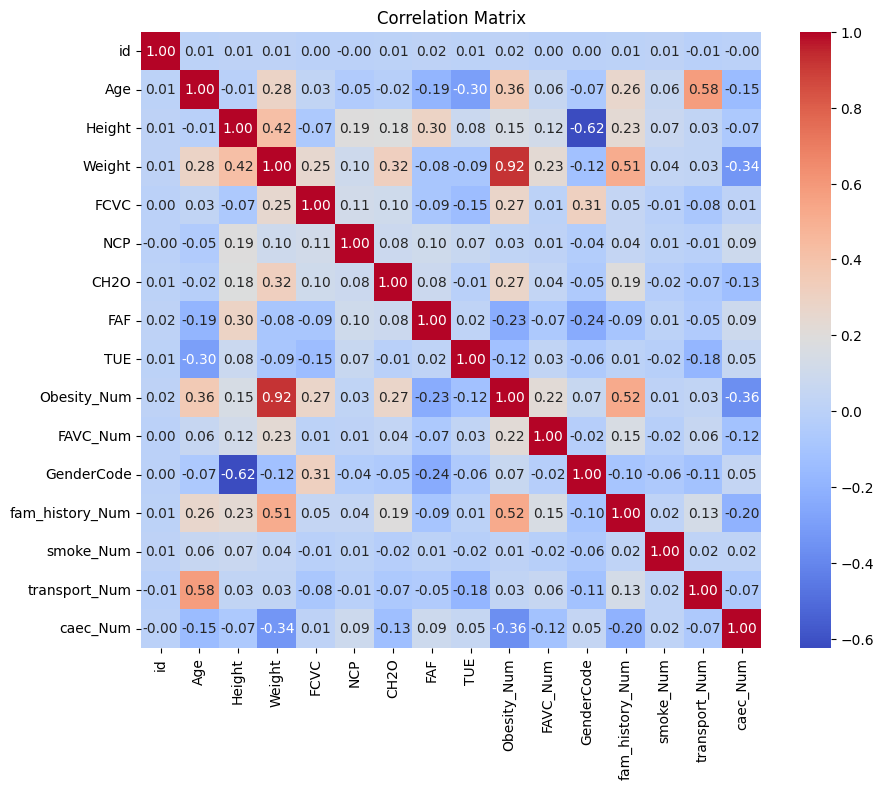

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'Obesity_Num', 'GenderCode', 'FAVC_Num'],
      dtype='object')

In [ ]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

#Funny encoding

In [ ]:
target_encoding = {'Obesity_Type_III':6,'Obesity_Type_II':5, 'Normal_Weight':1, 'Obesity_Type_I':4, 'Insufficient_Weight':0, 'Overweight_Level_II':3, 'Overweight_Level_I':2 }

In [ ]:
df['Obesity_Num'] = df['NObeyesdad'].map(target_encoding)

In [ ]:
FAVC_encoding = {'yes':1, 'no':0}
df['FAVC_Num'] = df['FAVC'].map(FAVC_encoding)

In [ ]:
gender = {'Male':0, 'Female':1}
df['GenderCode'] = df['Gender'].map(gender)

In [ ]:
fam_history = {'yes':1, 'no':0}
df['fam_history_Num'] = df['family_history_with_overweight'].map(fam_history)

In [ ]:
smoker = {'yes':1, 'no':0}
df['smoke_Num'] = df['SMOKE'].map(smoker)

In [ ]:
transport = {'Public_Transportation':2, 'Automobile':4, 'Walking':0, 'Motorbike':3,
       'Bike':1}
df['transport_Num'] = df['MTRANS'].map(transport)

In [ ]:
caec = {'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3
        }
df['caec_Num'] = df['CAEC'].map(caec)

In [ ]:
scc = {'yes':1, 'no':0}
df['scc_Num'] = df['SCC'].map(scc)

#Machine Learning

In [ ]:
cols = ['Height', 'Weight', 'Age', 'GenderCode', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'FAVC_Num', 'fam_history_Num', 'smoke_Num', 'transport_Num', 'caec_Num', 'scc_Num']
X = df[cols]
y = df['Obesity_Num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [52]:
xgb_model = xgb.XGBClassifier(
    learning_rate=.01,
    n_estimators=2000,
    max_depth=8,
    min_child_weight = 5,
    tree_method = 'auto',
    eval_metric = 'logloss',
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_pred = xgb_model.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy_xg))

Accuracy: 0.905427103403982


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.90077071 0.90366089 0.9017341  0.89520597 0.9043604 ]
Mean Accuracy: 0.9011464145650072


In [51]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you already have defined y_test and y_pred

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate confusion matrix percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Round confusion matrix percentages
cm_percent_rounded = np.round(cm_percent, decimals=2)

# Define class labels
class_labels = ['Obesity_Type_III','Obesity_Type_II','Normal_Weight', 'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II', 'Overweight_Level_I']

# Print the confusion matrix with percentages and labels
print("Confusion Matrix (Percentages):")
print("\t\tPredicted")
print("\t\t" + "\t".join(class_labels))
for i, row_label in enumerate(class_labels):
    row_string = "{}\t\t".format(row_label)
    for j in range(len(class_labels)):
        row_string += "{:.2f}\t\t".format(cm_percent_rounded[i, j])
    print(row_string)

Confusion Matrix (Percentages):
		Predicted
		Obesity_Type_III	Obesity_Type_II	Normal_Weight	Obesity_Type_I	Insufficient_Weight	Overweight_Level_II	Overweight_Level_I
Obesity_Type_III		95.20		4.30		0.38		0.13		0.00		0.00		0.00		
Obesity_Type_II		5.43		88.48		4.78		1.20		0.11		0.00		0.00		
Normal_Weight		0.97		8.98		76.10		12.43		1.52		0.00		0.00		
Obesity_Type_I		0.00		1.66		8.58		80.77		8.58		0.41		0.00		
Insufficient_Weight		0.23		0.23		1.26		5.75		88.97		3.56		0.00		
Overweight_Level_II		0.00		0.00		0.00		0.64		2.03		97.22		0.11		
Overweight_Level_I		0.00		0.00		0.00		0.00		0.16		0.08		99.76		


In [ ]:
param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [700, 850, 1000],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 850}
Accuracy: 0.9067116249197174


###Test Data

In [33]:
df_test = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/obesity_test.csv')

In [34]:
gender = {'Male':0, 'Female':1}
df_test['GenderCode'] = df_test['Gender'].map(gender)

In [35]:
FAVC_encoding = {'yes':1, 'no':0}
df_test['FAVC_Num'] = df_test['FAVC'].map(FAVC_encoding)

In [36]:
fam_history = {'yes':1, 'no':0}
df_test['fam_history_Num'] = df_test['family_history_with_overweight'].map(fam_history)

In [37]:
smoker = {'yes':1, 'no':0}
df_test['smoke_Num'] = df_test['SMOKE'].map(smoker)

In [38]:
transport = {'Public_Transportation':2, 'Automobile':4, 'Walking':0, 'Motorbike':3,
       'Bike':1}
df_test['transport_Num'] = df_test['MTRANS'].map(transport)

In [39]:
caec = {'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3
        }
df_test['caec_Num'] = df_test['CAEC'].map(caec)

In [43]:
scc = {'yes':1, 'no':0}
df_test['scc_Num'] = df_test['SCC'].map(scc)

In [44]:
X_test_data = df_test[cols]

In [45]:
X_test_data

,Height,Weight,Age,GenderCode,FCVC,NCP,CH2O,FAF,TUE,FAVC_Num,fam_history_Num,smoke_Num,transport_Num,caec_Num,scc_Num
0,1.848294,120.644178,26.899886,0,2.938616,3.000000,2.825629,0.855400,0.000000,1,1,0,2,1,0
1,1.600000,66.000000,21.000000,1,2.000000,1.000000,3.000000,1.000000,0.000000,1,1,0,2,1,0
2,1.643355,111.600553,26.000000,1,3.000000,3.000000,2.621877,0.000000,0.250502,1,1,0,2,1,0
3,1.553127,103.669116,20.979254,0,2.000000,2.977909,2.786417,0.094851,0.000000,1,1,0,2,1,0
4,1.627396,104.835346,26.000000,1,3.000000,3.000000,2.653531,0.000000,0.741069,1,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1.721384,78.030383,23.327836,0,2.813234,3.000000,1.000000,0.807076,0.778632,0,1,0,2,1,0
13836,1.590000,62.000000,29.000000,1,3.000000,3.000000,2.000000,0.000000,0.000000,1,0,0,2,1,0
13837,1.585547,44.376637,22.935612,1,3.000000,2.273740,2.000000,1.949840,1.000000,1,0,0,2,2,0
13838,1.620000,53.000000,21.000000,0,2.000000,3.000000,2.000000,3.000000,2.000000,1,1,0,2,1,0


In [54]:
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
y_pred_test = xgb_model.predict(X_test_data)

In [48]:
len(y_pred_test)

13840

In [ ]:
df_test['Results'] = y_pred_test

<ipython-input-91-6aeb3ddda6f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_test.corr()


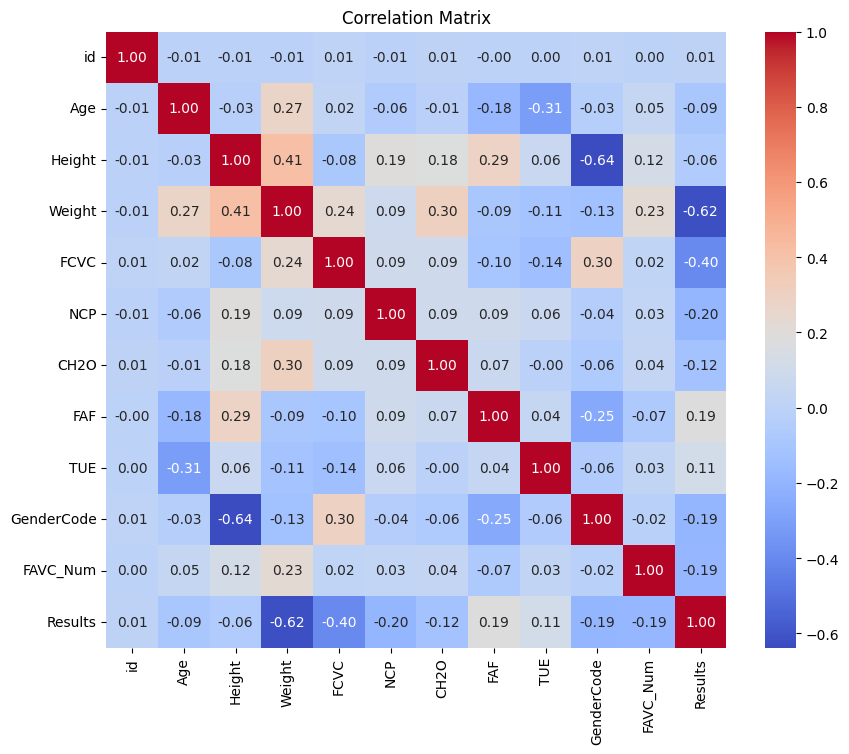

In [ ]:
correlation_matrix = df_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [49]:
unencoding = {6: 'Obesity_Type_III', 5: 'Obesity_Type_II', 1: 'Normal_Weight', 4: 'Obesity_Type_I', 0: 'Insufficient_Weight', 3: 'Overweight_Level_II', 2: 'Overweight_Level_I'}

###Kaggle Exporting

In [55]:
kaggle_xg = pd.DataFrame(data = {'id':df_test['id'], 'NObeyesdad_Num':y_pred_test})
kaggle_xg['NOBeyesdad'] = kaggle_xg['NObeyesdad_Num'].map(unencoding)
kaggle_xg_final = kaggle_xg.drop(columns = 'NObeyesdad_Num')
kaggle_xg_final.set_index('id', inplace=True)
kaggle_xg_final.to_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/obesity_predictions_3.csv')

In [ ]:
kaggle_xg

,id,NObeyesdad_Num,NOBeyesdad
0,20758,5,Obesity_Type_II
1,20759,2,Overweight_Level_I
2,20760,6,Obesity_Type_III
3,20761,4,Obesity_Type_I
4,20762,6,Obesity_Type_III
...,...,...,...
13835,34593,3,Overweight_Level_II
13836,34594,2,Overweight_Level_I
13837,34595,0,Insufficient_Weight
13838,34596,1,Normal_Weight
